# FAKE NEWS DETECTION by NITIKA 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

READING THE DATASETS

In [54]:
fake = pd.read_csv("C:\\Users\\Nitika Maini\\OneDrive\\ADG\\IBMDS\\project\\Fake.csv")
true = pd.read_csv("C:\\Users\\Nitika Maini\\OneDrive\\ADG\\IBMDS\\project\\True.csv")

In [55]:
fake.shape

(23481, 4)

In [56]:

true.shape

(21417, 4)

DATA CLEANING AND PREPARATION

In [57]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'


In [58]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape
(44898, 5)


(44898, 5)

In [59]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)


In [60]:
# Check the data
data.head()

,title,text,subject,date,target
0,PC GONE WILD: PROFESSORS THREATEN STUDENTS WIT...,The left has waged a full scale war against ou...,left-news,"Aug 29, 2015",fake
1,NEW YORK KNOWN WOLF: Halloween Truck Attacker ...,Shawn Helton 21st Century WireYears before al...,Middle-east,"November 1, 2017",fake
2,"Britain committed to no hard Irish border, wha...",LONDON (Reuters) - Britain intends to prevent ...,worldnews,"December 11, 2017",true
3,Saudi king arrives in Moscow: Russian state TV,MOSCOW (Reuters) - Saudi Arabia s King Salman ...,worldnews,"October 4, 2017",true
4,How a border tax could divide Boeing and its s...,SEATTLE (Reuters) - A U.S. tax overhaul propos...,politicsNews,"March 24, 2017",true


In [61]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,PC GONE WILD: PROFESSORS THREATEN STUDENTS WIT...,The left has waged a full scale war against ou...,left-news,fake
1,NEW YORK KNOWN WOLF: Halloween Truck Attacker ...,Shawn Helton 21st Century WireYears before al...,Middle-east,fake
2,"Britain committed to no hard Irish border, wha...",LONDON (Reuters) - Britain intends to prevent ...,worldnews,true
3,Saudi king arrives in Moscow: Russian state TV,MOSCOW (Reuters) - Saudi Arabia s King Salman ...,worldnews,true
4,How a border tax could divide Boeing and its s...,SEATTLE (Reuters) - A U.S. tax overhaul propos...,politicsNews,true


In [62]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,The left has waged a full scale war against ou...,left-news,fake
1,Shawn Helton 21st Century WireYears before al...,Middle-east,fake
2,LONDON (Reuters) - Britain intends to prevent ...,worldnews,true
3,MOSCOW (Reuters) - Saudi Arabia s King Salman ...,worldnews,true
4,SEATTLE (Reuters) - A U.S. tax overhaul propos...,politicsNews,true


In [63]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Nitika
[nltk_data]     Maini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


DATA EXPLORATION

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


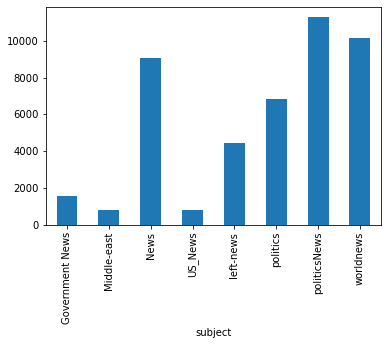

In [64]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


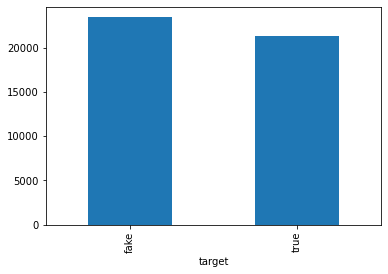

In [65]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

MODELING

In [70]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

PREPARING THE DATA

In [71]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

In [72]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.92%


Confusion matrix, without normalization


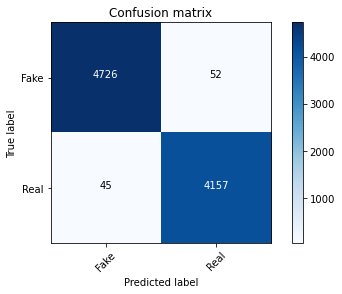

In [73]:

cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

DECISION TREE CLASSIFIER

In [74]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.73%


Confusion matrix, without normalization


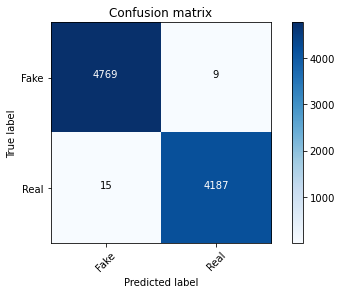

In [75]:

cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

RANDOM FOREST CLASSIFIER

In [76]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.08%


Confusion matrix, without normalization


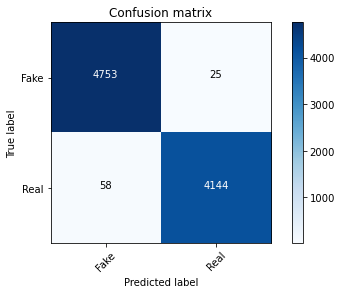

In [77]:

cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])